In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Praneeth Kalluri\Desktop\House Price prediction\train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Droping ID column as it just indicates the number of rows and doesnt contribute to model
data.drop('Id',axis=1,inplace=True)
data.shape

(1460, 80)

### Data Analysis

1. Target Variable
2. Independent Variables analysis
3. Missing data
4. Numerical Variables
    - Discrete
    - Continous
    - Distributions
    - Transformations
5. Categorical Variables
    - Cardinality
    - Rare Labels
    - Special Mappings

#### 1. Target Variable

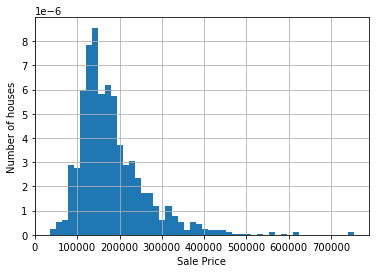

In [5]:
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

- We can see that dependent variable is continuous and distribution is skewed to right. 
- Applying log transformation to improve the distribution

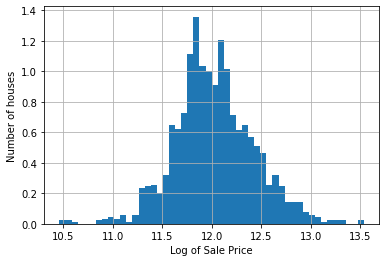

In [6]:
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

#### 2. Independent Variables analysis

In [7]:
#Identifying categorical variables
cat_var=[var for var in data.columns if data[var].dtype=='O']
cat_var

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
len(cat_var)

43

MSSubClass is also a categorical variable from data description provided. Hence adding it to the list of categorical variables

In [9]:
cat_var=cat_var+['MSSubClass']

In [10]:
len(cat_var)

44

In [11]:
#Casting all variables in cat_var as Object dtype
data[cat_var] = data[cat_var].astype('O')

In [12]:
#Identifying numerical variables
num_var = [var for var in data.columns if var not in cat_var and var != 'SalePrice']

# number of numerical variables
len(num_var)

35

#### 3. Missing values

In [13]:
# list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

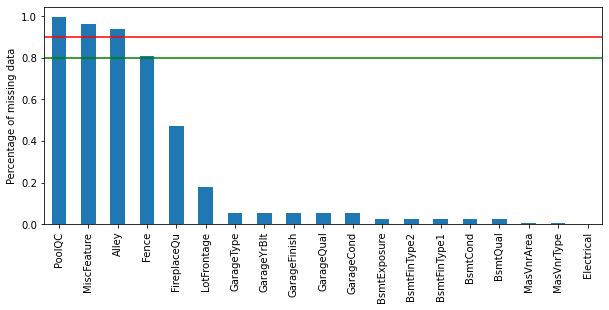

In [14]:
# ploting the above data

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

PoolQC, Miscfeature,Alley,Fence have very big proprtion of data missing.

In [15]:
cat_na = [var for var in cat_var if var in vars_with_na]
num_na = [var for var in num_var if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


##### Relationship between missing values and target variable

In [16]:
def na_val(data,var):
    df=data.copy()
    #Indicating missing value with 1 and otherwise indicating as 0
    df[var] = np.where(df[var].isnull(), 1, 0)
    #Comparing median SalePrice in observations data is missing with observations data is available
    tmp=df.groupby(var)['SalePrice'].agg(['mean','std'])
    tmp.plot(kind="barh", y="mean", legend=False,xerr="std", title="Sale Price", color='green')
    plt.show()

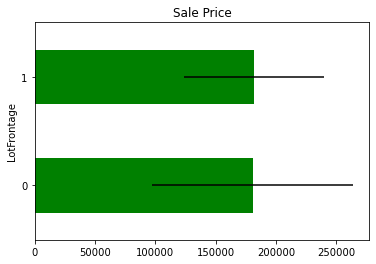

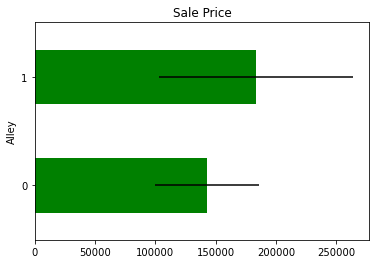

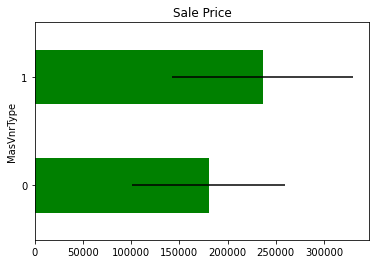

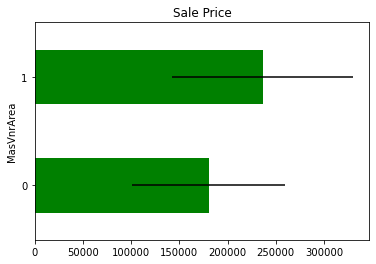

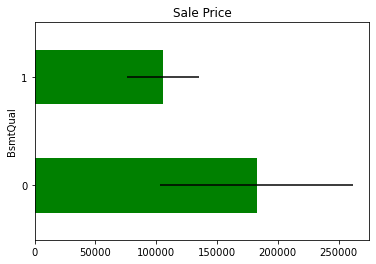

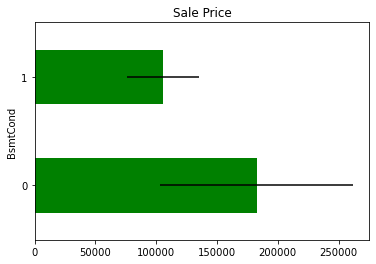

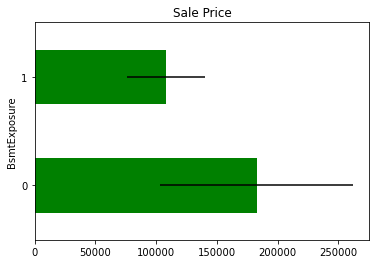

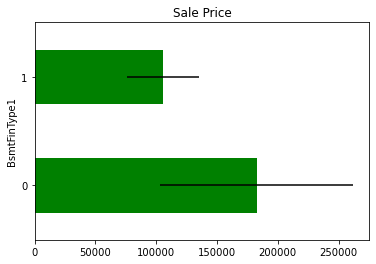

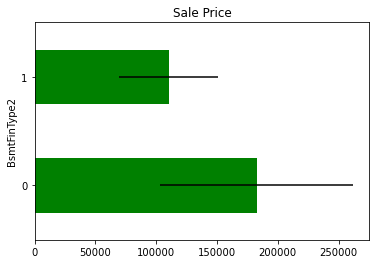

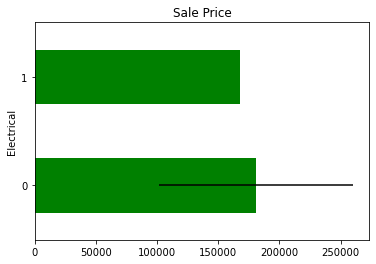

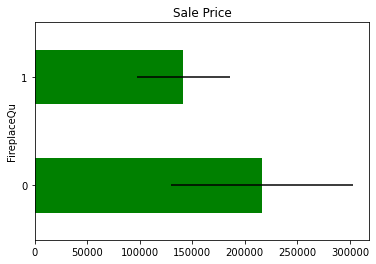

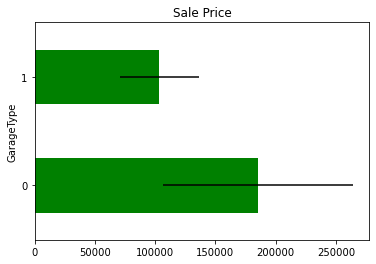

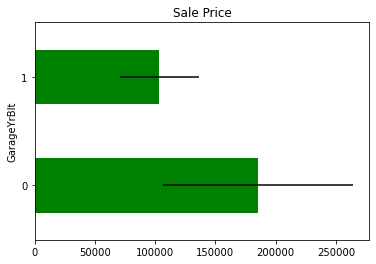

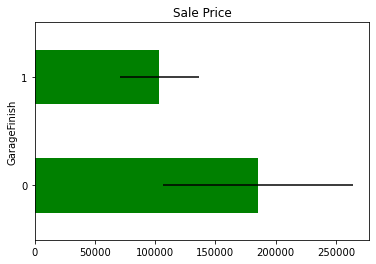

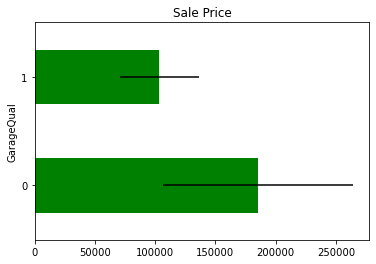

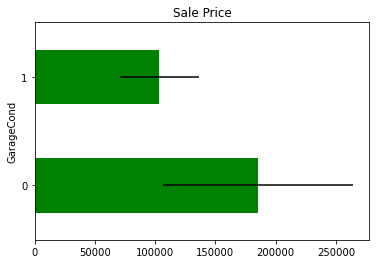

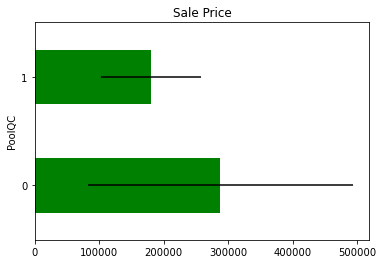

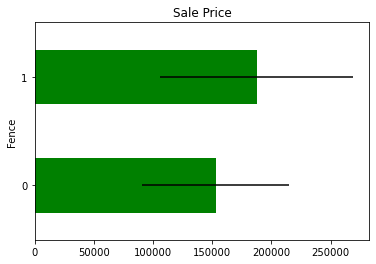

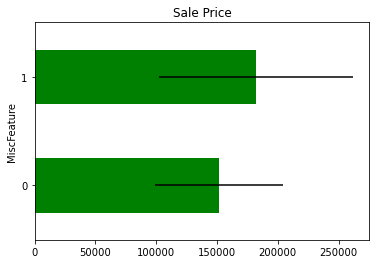

In [17]:
for var in vars_with_na:
    na_val(data,var)

It is observed that for some variables like LotFrontage, the avg sales price for information missing entries is different from where the info exists. This suggests that data being missing could be good predictor of Sales Price

### 4. Numerical Variables

In [18]:
data[num_var].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


#### Temporal variables

We see there are 4 year variables in the dataset: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

In [19]:
year_var=[var for var in num_var if 'Yr'in var or 'Year' in var]
year_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Median House Price')

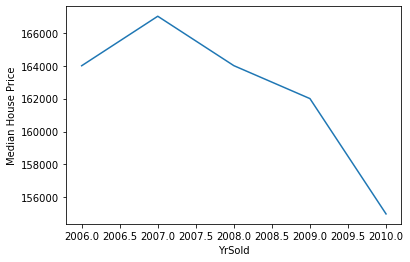

In [20]:
#Ploting Median sales price vs year in which it was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Generally there should be increase in sale pricce value with years passing by, but here it is observed to be decreasing. So lets explore further as to understand why there is decrease

Text(0, 0.5, 'Median House Price')

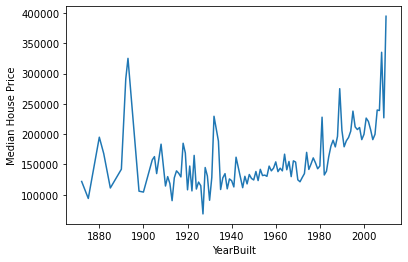

In [21]:
# plot median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

It is observed that newly built houses are expensive.This makes some sense,but lets explore more tO understand why this is the case.

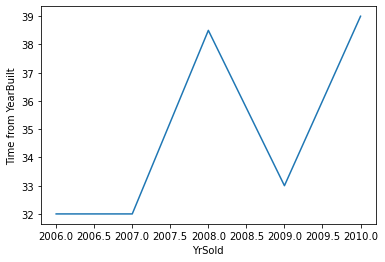

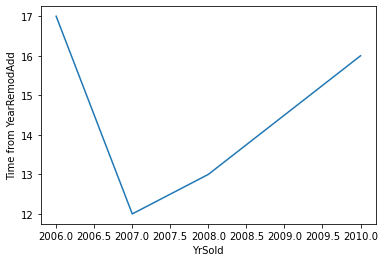

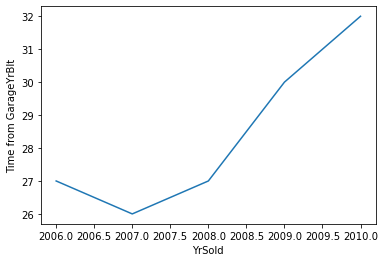

In [22]:
# Capturing elapse years between Year variables and the year in which house was sold

def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()
    
    
for var in year_var:
    if var !='YrSold':
        analyse_year_vars(data, var)

From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

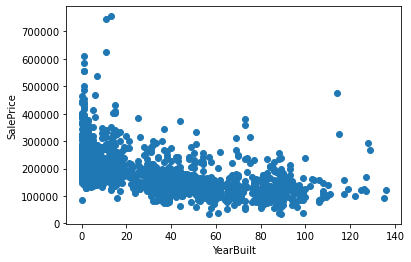

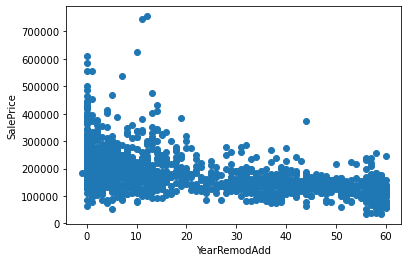

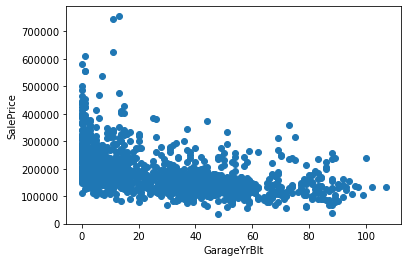

In [23]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_var:
    if var !='YrSold':
        analyse_year_vars(data, var)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price.Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

#### Discrete Variables

In [24]:
discrete_var = [var for var in num_var if len(data[var].unique()) < 20 and var not in year_var]
print('Number of discrete variables: ', len(discrete_var))

Number of discrete variables:  13


In [25]:
data[discrete_var].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables discribe different aspects of house such as no.of rooms, units, Month in which house is sold etc. Expected behavior would be with high the value , higher will be Sales Price

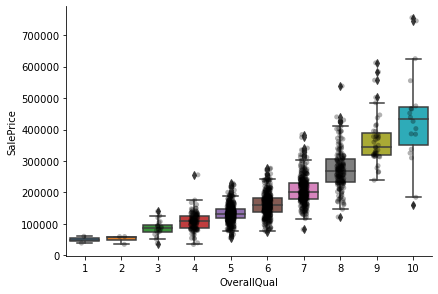

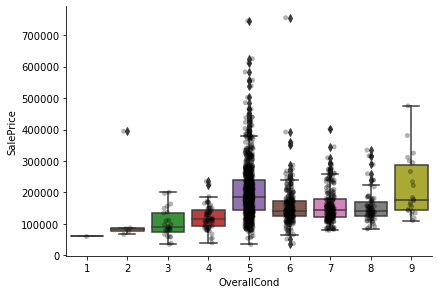

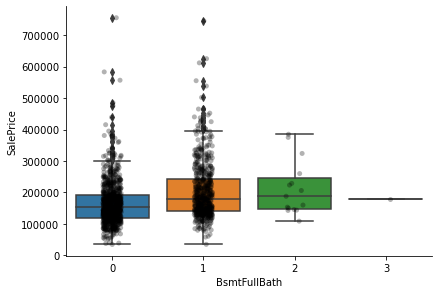

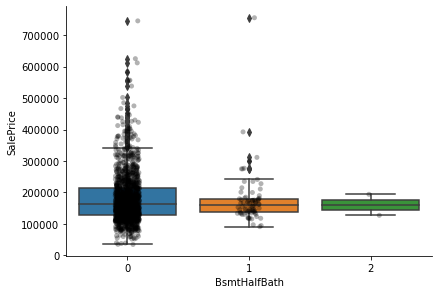

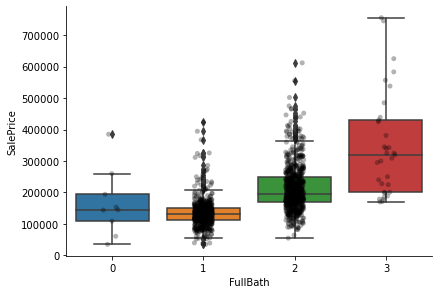

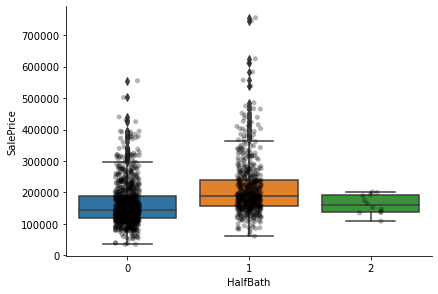

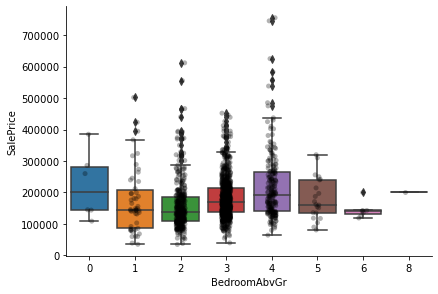

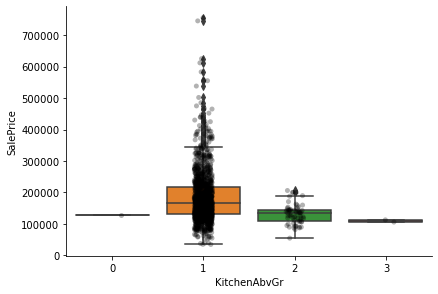

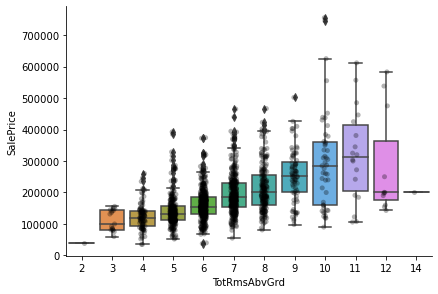

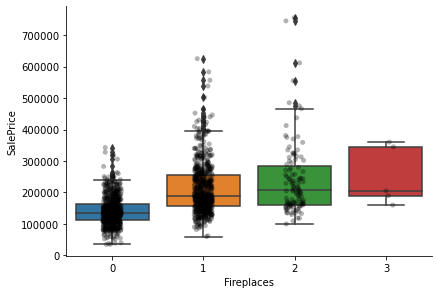

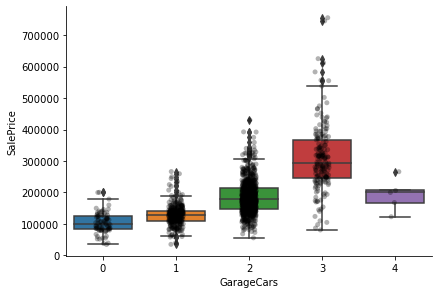

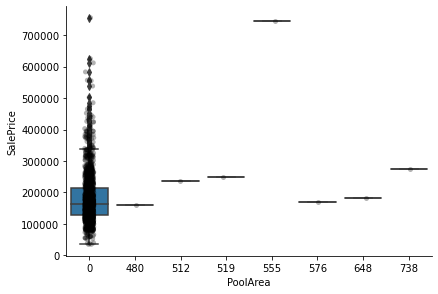

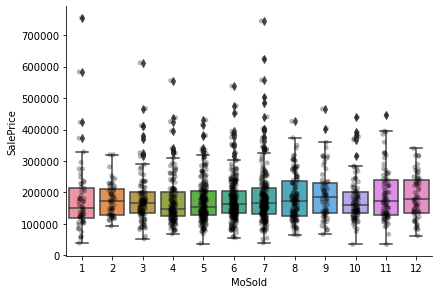

In [26]:
for var in discrete_var:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most of these discrete variables, increase in sales price is seen with increase in variable value. For variables with which this trend is not observed could bot be good predictor of sales price

#### Continuous Variables

In [27]:
cont_var = [var for var in num_var if var not in discrete_var+year_var]

print('Number of continuous variables: ', len(cont_var))
data[cont_var].head()

Number of continuous variables:  18


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


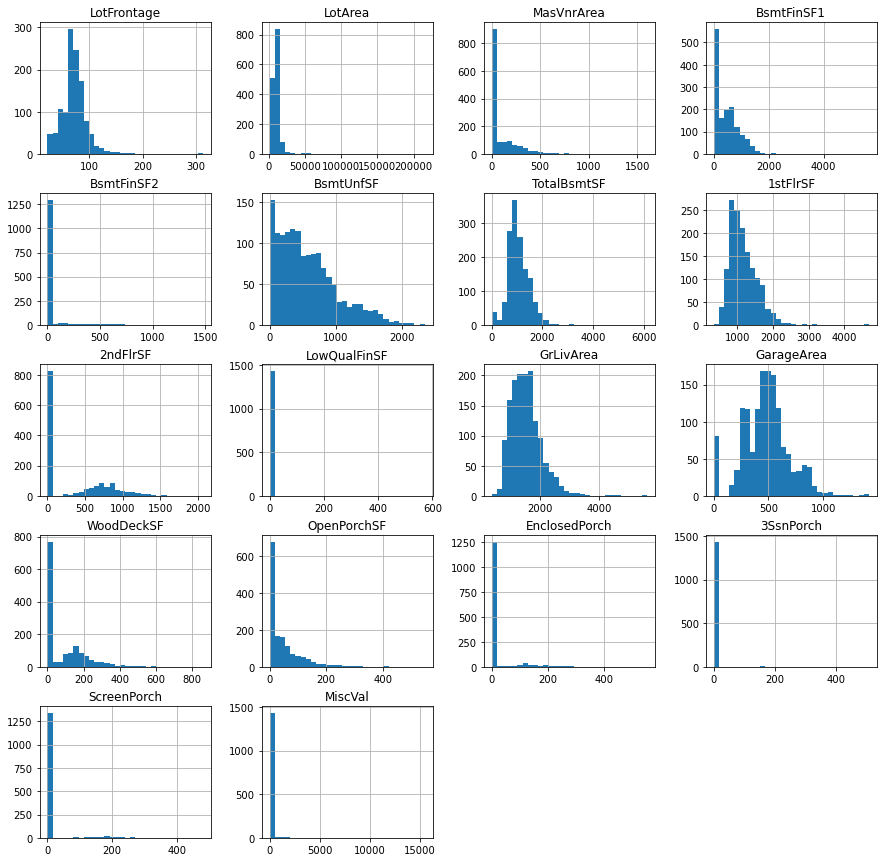

In [28]:
data[cont_var].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.